# Популярный продукт 

Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

## Изучение данных из датафрейма.

In [1]:
# импортирование всех нужных библиотек 
import pandas as pd 
import math
import numpy as np
import seaborn as sns
from scipy import stats as st

# формирование датафрейма
data = pd.read_csv('dataset_games.csv')

# просмотр общей информации о датафрейме
display(data)
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

## Подготовка данных.

### Приведение названия столбцов к нижнему регистру.

In [95]:
# приведение названия столбцов к нижнему регистру
data.columns = map(str.lower, data.columns.tolist())

# проверка внесенных изменений 
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Изменение типов данных в столбцах:
* 'critic_score' в 'Int64': так как оценка критиков - целое число.
* 'year_of_release' в 'Int64': так как год - целое число.
* 'user_score' в 'float64': так как оценка пользователей - дробное число.

В столбце 'user_score' были замечены значения 'tbd'. Они значились у игр с небольшим количеством продаж, можно сделать вывод, что значение 'tbd' значит малое количество оценок пользователей для выставления средней. В таком случае, 'tbd' можно заменить на NaN.

In [96]:
# замена значений 'tbd' на NaN
data.loc[(data.user_score == 'tbd'), 'user_score'] = np.nan

# изменение типов данных
data['user_score'] = pd.to_numeric(data['user_score'])
data['critic_score'] = data['critic_score'].astype('Int64')
data['year_of_release'] = data['year_of_release'].astype('Int64')

# проверка внесенных изменений 
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


### Обработка пропусков.
* Два пропущенных значения в столбах 'name' и 'genre' соответствуют двум строкам. Их можно удалить, так как это не скажется на последующем анализе.
* Пропуски в столбцах 'rating', 'year_of_release', 'user_score', 'critic_score' следует оставить, так как пока что не известно чем их можно заполнить, возможно, коллеги найдут способ.

In [97]:
# удаление двух не нужных строк
data.dropna(inplace=True, subset=['name'])

# сброс индексов
data.reset_index(drop=True, inplace=True)

# проверка внесенных изменений 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Суммарные продажи в регионах.
Добавление столбца с суммарным количеством продаж.

In [98]:
# добавление столбца с суммарным количеством продаж
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# проверка внесенных изменений 
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


## Исследовательский анализ данных.

### Отбор потенциально прибыльных платформ и определение актуального периода.

По гистограмме видно, что рост количества выпущенных видеоигр начинается с 2000-го года.

<AxesSubplot:ylabel='Frequency'>

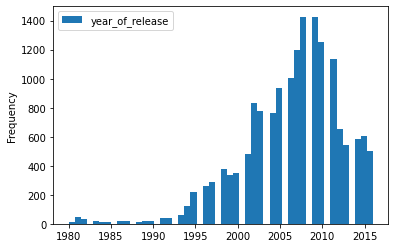

In [99]:
# гистограмма по датам выхода игр 
display(data.plot(y='year_of_release', kind='hist', bins=50))

По графикам платформ с наибольшими суммарными продажами видно, что характерный период "жизни" платформы - примерно 6 лет. 

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

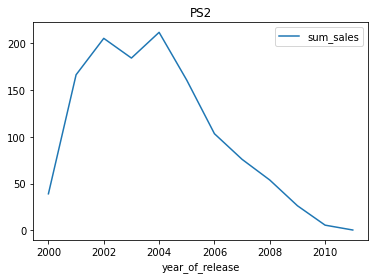

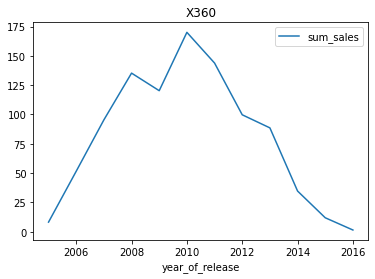

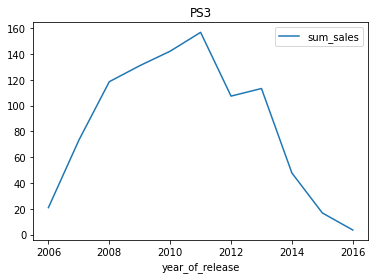

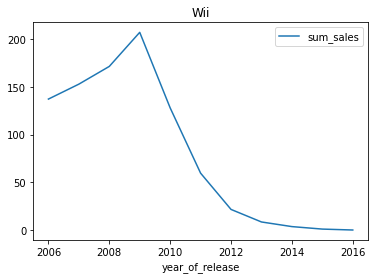

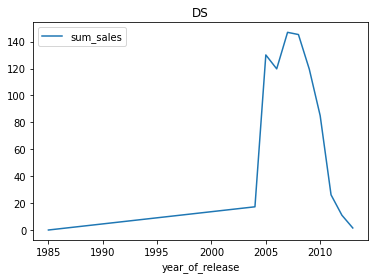

In [100]:
# формирование сводной таблицы с суммарными продажами по платформам
data_platforms_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
display(data_platforms_sales.sort_values(by='sum_sales', ascending=False).head())

# цикл для создания линейных графиков продаж по годам с пятью самыми популярными платформами
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS']:
    display(data.query('platform == @i')
                .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
                .plot(y='sum_sales', kind='line', title=i)
           )

**Актуальным периодом будет промежуток с 2015 года по 2016 включительно.**

In [101]:
# формирование датафрейма с актуальным периодом
actual_data = data.query('year_of_release >= 2015')

# сброс индексов
actual_data.reset_index(drop=True, inplace=True)

# проверка внесенных изменений
display(actual_data.head())
actual_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1108 non-null   object 
 1   platform         1108 non-null   object 
 2   year_of_release  1108 non-null   Int64  
 3   genre            1108 non-null   object 
 4   na_sales         1108 non-null   float64
 5   eu_sales         1108 non-null   float64
 6   jp_sales         1108 non-null   float64
 7   other_sales      1108 non-null   float64
 8   critic_score     457 non-null    Int64  
 9   user_score       559 non-null    float64
 10  rating           595 non-null    object 
 11  sum_sales        1108 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 106.2+ KB


Лидирующие позиции по продажам за актуальный период занимают: 'PS4', 'PS3', 'WiiU', '3DS', 'XOne'. Из них **'3DS', 'XOne', 'PS4'** имеют внушительные продажи за 2016 год по сравнению с остальными платформами. Все платформы падают к 2016 году (скорее всего вызвано неполнотой данных за 2016  год), наиболее устойчивые к падению: 'PS4' и 'XOne'.

**Потенциально прибыльными платформами можно считать: '3DS', 'XOne', 'PS4'**.

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


<AxesSubplot:title={'center':'3DS'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PC'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PSP'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'PSV'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'WiiU'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

<AxesSubplot:title={'center':'XOne'}, xlabel='year_of_release'>

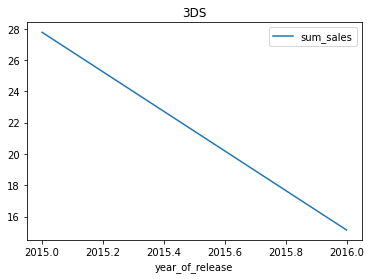

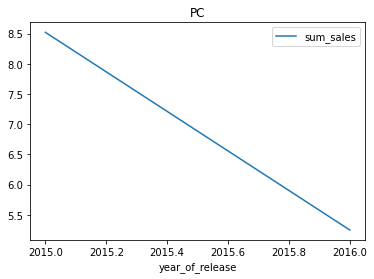

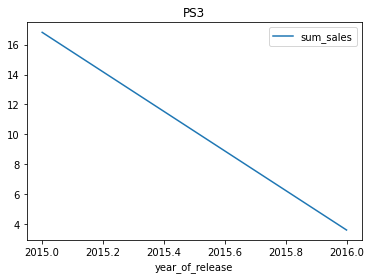

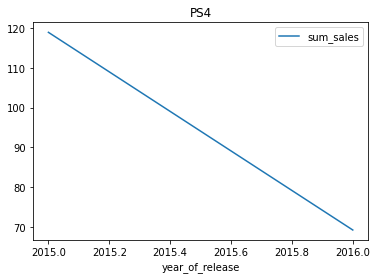

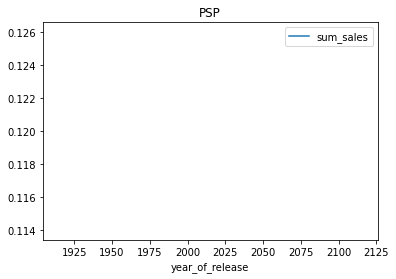

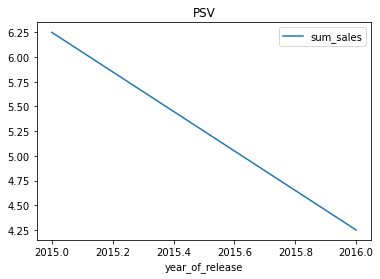

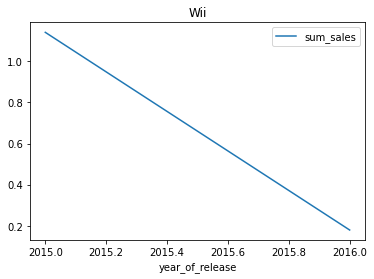

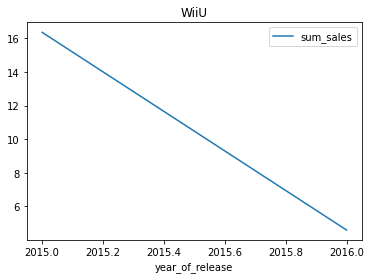

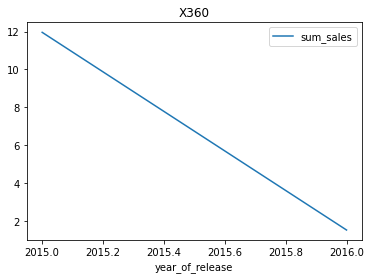

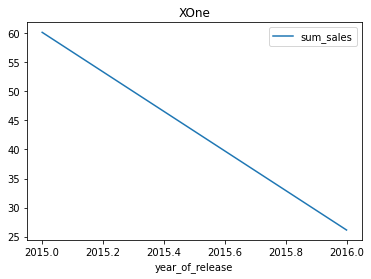

In [102]:
# формирование датафрейма с актуальным периодом и суммарными продажами по платформам и годам 
actual_platforms_data = (actual_data.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
                                    .reset_index(level=[0, 1]))

# сводная таблица с самыми популярными платформами за актуальный период
display(actual_platforms_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                             .sort_values(by='sum_sales', ascending=False))

# цикл для создания линейных графиков продаж по годам по всем платформам за актуальный период
for i in actual_platforms_data['platform'].unique():
    display(actual_platforms_data.query('platform == @i')
                                 .plot(kind='line', x='year_of_release', y='sum_sales', title=i))

Лидерами по медианным продажам так же являются: 'PS4', 'PS3', 'WiiU', '3DS', 'XOne'. Платформа 'PS4' превосходит своего предшественника 'PS3' почти в два раза, что нельзя сказать о 'XOne' и 'X360', продажи у них почти одинаковые.

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

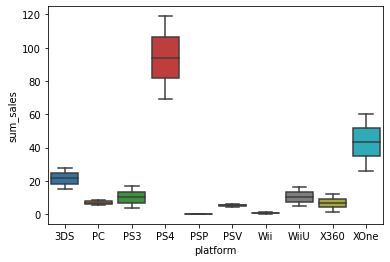

In [103]:
# боксплоты для продаж по платформам
display(sns.boxplot(y=actual_platforms_data['sum_sales'], x=actual_platforms_data['platform']))

### Корреляция оценок и продаж.

**Корреляция между оценками и продажами на популярных платформах чуть сильнее выражена, чем на остальных платформах. Как факт, зависимость продаж к оценкам пользователей и критиков очень слабая.**

* Корреляция между продажами и оценками пользователей близка к нулю на всех трех платформах.
* Корреляция между продажами и оценками критиков слабая на: 'PS4', 'XOne', а на '3DS' очень слабая.

<AxesSubplot:title={'center':'3DS (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.17757455046092874 --- 3DS'

<AxesSubplot:title={'center':'XOne (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.43088874582136805 --- XOne'

<AxesSubplot:title={'center':'PS4 (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.3928485555130601 --- PS4'

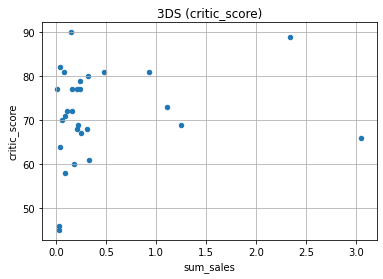

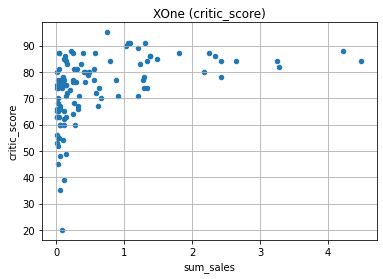

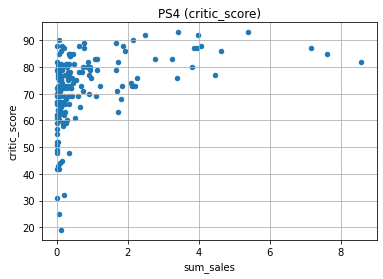

In [104]:
# цикл для создания диаграмм рассеяния и вычисления коэффициента корреляции 
# по продажам и оценкам критиков по трем самым востребованным платформам 
for i in ['3DS', 'XOne', 'PS4']:
    corr_actual_data = actual_data.query('platform == @i')
    display(corr_actual_data.plot(kind='scatter', y='critic_score', x='sum_sales', title=(i + ' (critic_score)'), grid=True))
    display(str(corr_actual_data['critic_score'].astype(float).corr(corr_actual_data['sum_sales'])) + ' --- ' + i)

<AxesSubplot:title={'center':'3DS (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'0.19879627008102982 --- 3DS'

<AxesSubplot:title={'center':'XOne (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'-0.04146733387366271 --- XOne'

<AxesSubplot:title={'center':'PS4 (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'-0.05973845712638215 --- PS4'

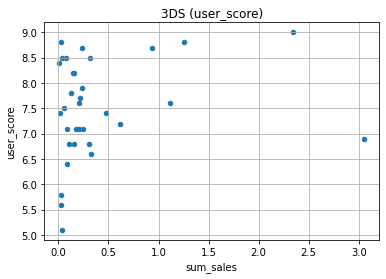

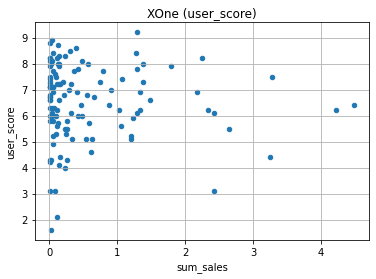

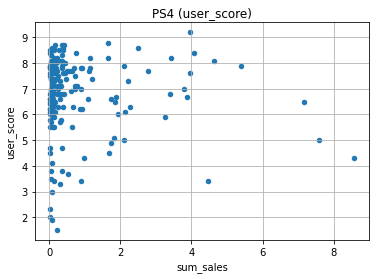

In [105]:
# цикл для создания диаграмм рассеяния и вычисления коэффициента корреляции 
# по продажам и оценкам пользователей по трем самым востребованным платформам 
for i in ['3DS', 'XOne', 'PS4']:
    corr_actual_data = actual_data.query('platform == @i')
    display(corr_actual_data.plot(kind='scatter', y='user_score', x='sum_sales', title=(i + ' (user_score)'), grid=True))
    display(str(corr_actual_data['user_score'].corr(corr_actual_data['sum_sales'])) + ' --- ' + i)

* Корреляция между продажами и оценками пользователей очень слабая или близка к нулю на всех платформах.
* Корреляция между продажами и оценками критиков слабая на: 'PS3', 'Wii', 'WiiU', 'X360', а на остальных платформах очень слабая или близка к нулю.

<AxesSubplot:title={'center':'PC (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.3773317477241351 --- PC'

<AxesSubplot:title={'center':'PS3 (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


'nan --- PS3'

<AxesSubplot:title={'center':'PSP (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'nan --- PSP'

<AxesSubplot:title={'center':'PSV (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.0036040833609397678 --- PSV'

<AxesSubplot:title={'center':'Wii (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'nan --- Wii'

<AxesSubplot:title={'center':'WiiU (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'0.317045711769622 --- WiiU'

<AxesSubplot:title={'center':'X360 (critic_score)'}, xlabel='sum_sales', ylabel='critic_score'>

'nan --- X360'

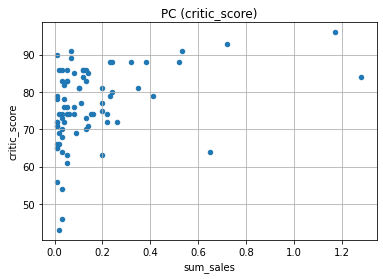

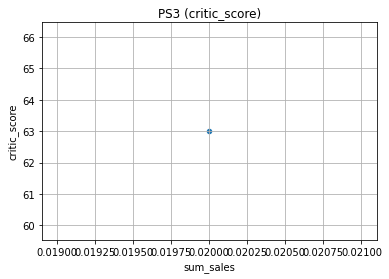

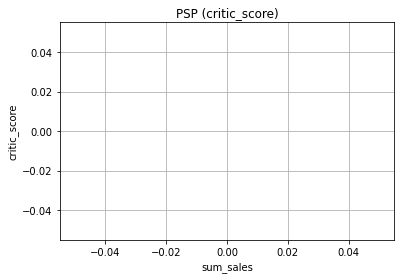

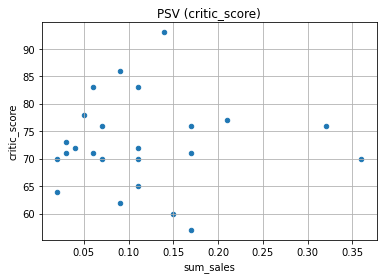

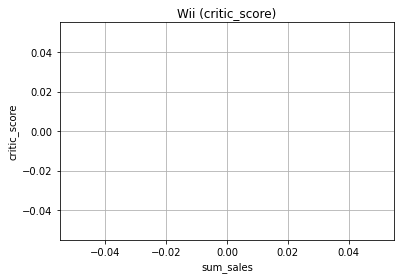

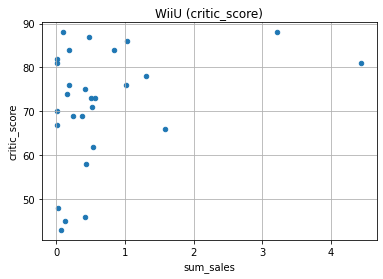

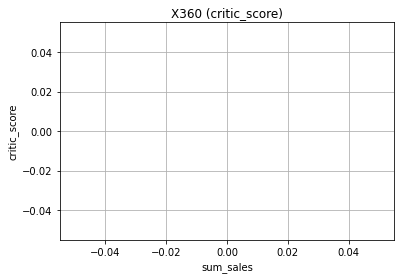

In [106]:
# формирование списка со всеми платформами за актуальный период
platform_list = list(actual_platforms_data['platform'].unique())

# удаление самых востребованных платформ из списка
for i in range(len(platform_list) + 1):
    for j in ['3DS', 'XOne', 'PS4']:
        if j in platform_list:
            platform_list.remove(j)

# цикл для создания диаграмм рассеяния и вычисления коэффициента корреляции 
# по продажам и оценкам критиков по остальным платформам 
for i in platform_list:
    corr_actual_data = actual_data.query('platform == @i')
    display(corr_actual_data.plot(kind='scatter', y='critic_score', x='sum_sales', title=(i + ' (critic_score)'), grid=True))
    display(str(corr_actual_data['critic_score'].astype(float).corr(corr_actual_data['sum_sales'])) + ' --- ' + i)

<AxesSubplot:title={'center':'PC (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'0.15038053045029076 --- PC'

<AxesSubplot:title={'center':'PS3 (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'-0.16529542277898507 --- PS3'

<AxesSubplot:title={'center':'PSP (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'nan --- PSP'

<AxesSubplot:title={'center':'PSV (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'0.07833473556248864 --- PSV'

<AxesSubplot:title={'center':'Wii (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'nan --- Wii'

<AxesSubplot:title={'center':'WiiU (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'0.3635185724809445 --- WiiU'

<AxesSubplot:title={'center':'X360 (user_score)'}, xlabel='sum_sales', ylabel='user_score'>

'-0.2813082274094897 --- X360'

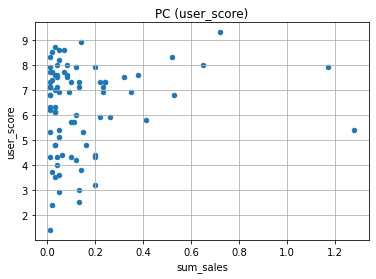

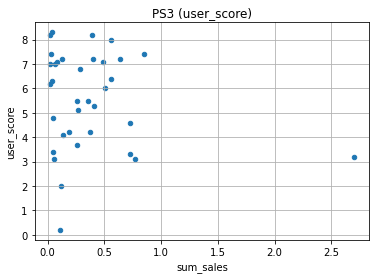

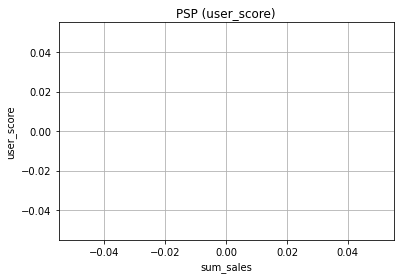

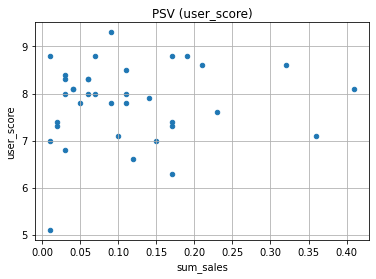

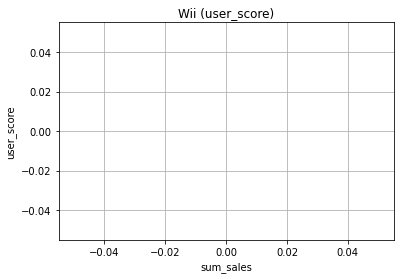

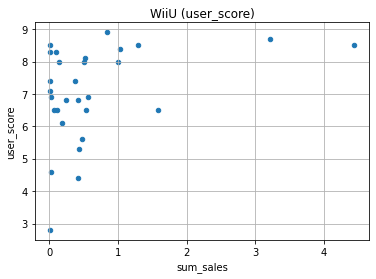

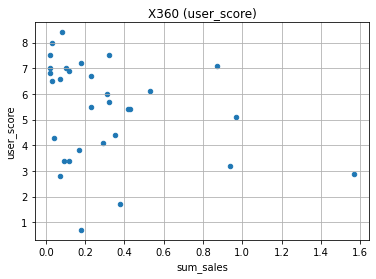

In [107]:
# цикл для создания диаграмм рассеяния и вычисления коэффициента корреляции 
# по продажам и оценкам пользователей по остальным платформам 
for i in platform_list:
    corr_actual_data = actual_data.query('platform == @i')
    display(corr_actual_data.plot(kind='scatter', y='user_score', x='sum_sales', title=(i + ' (user_score)'), grid=True))
    display(str(corr_actual_data['user_score'].corr(corr_actual_data['sum_sales'])) + ' --- ' + i)

### Распределение игр по жанрам.

**Самые прибыльные жанры: 'Shooter', 'Action', 'Sports'**. При условии, что соотношение продаж к количеству игр жанра в среднем находится около 0.5, очень сильно бросаются в глаза жанры: 'Shooter'. <br><br>
У жанра 'Shooter' коэффициент равен 1.3, это означает, что на одну игру приходится почти в два с половиной раза больше продаж, чем у остальных жанров.<br>
Также стоит выделить жанр 'Action' с большим количеством выпущенных игр по сравнению с остальными жанрами: 430 против 132 (132 - второе по величине значение после 'Role-Playing')<br>

<AxesSubplot:xlabel='genre'>

,sum_sales,count,ratio
genre,,,
Shooter,105.73,81,1.305309
Action,102.13,431,0.236961
Sports,64.33,107,0.601215
Role-Playing,55.82,132,0.422879
Misc,14.17,71,0.199577
Fighting,12.37,37,0.334324
Adventure,11.98,110,0.108909
Racing,10.86,42,0.258571
Platform,9.28,28,0.331429


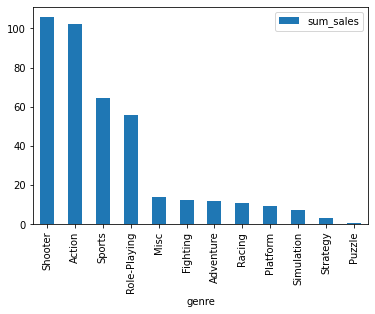

In [108]:
# формирование датафрейма с суммарными продажами, с количеством выпущенных игр и с их соотношением по жанрам
genre_games_data = actual_data.pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'count'])
genre_games_data.columns = ['sum_sales', 'count']
genre_games_data['ratio'] = genre_games_data['sum_sales'] / genre_games_data['count']

# проверка результатов и вычисление среднего по столбцу соотношения
display(genre_games_data.sort_values(by='sum_sales', ascending=False)
                        .plot(kind='bar', y='sum_sales'))

# построение столбчатого сортированного графика
display(genre_games_data.sort_values(by='sum_sales', ascending=False))

## Составление портретов пользователей каждого регионов.


### Популярность платформ.

У пользователей Северной Америки пять самых популярных платформ: **'PS4', 'XOne', '3DS', 'WiiU', 'X360'**. <br>
А у пользователей Европы пять самых популярных платформ: **'PS4', 'XOne', 'PC', '3DS', 'PS3'**. <br>
Пять самых популярных платформ у пользователи Японии: **'3DS', 'PS4', 'PSV', 'PS3', 'WiiU'**. <br> 
Что удивительно, платформы серии XBox (XOne, X360) вообще не пользвуются спросом.

,eu_sales,jp_sales,na_sales
platform,,,
3DS,7.39,23.55,10.31
PS4,83.54,12.05,63.86
PSV,1.08,8.41,0.54
PS3,7.30,4.97,5.66
WiiU,6.49,4.12,8.86
XOne,28.10,0.18,50.30
PSP,0.00,0.12,0.00
PC,9.10,0.00,3.72
Wii,0.73,0.00,0.49


<AxesSubplot:ylabel='na_sales'>

<AxesSubplot:ylabel='eu_sales'>

<AxesSubplot:ylabel='jp_sales'>

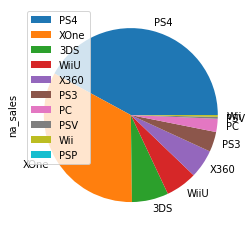

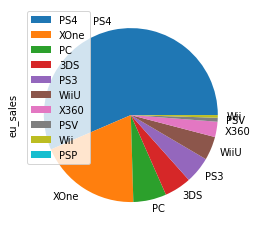

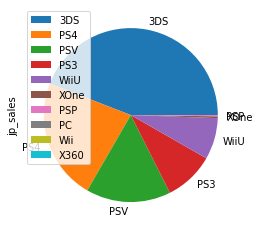

In [109]:
# отображение сводной таблицы с распределением продаж по платформам в разных регионах
display(actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False))

# отображение круговых диаграмм
display(actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False)
                   .plot(y='na_sales', kind='pie'))

display(actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False)
                   .plot(y='eu_sales', kind='pie'))

display(actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False)
                   .plot(y='jp_sales', kind='pie'))

### Популярность жанров.

У пользователей Европы и Северной Америки пять самых популярных жанров почти совпадают: **'Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'**. За исключением пятого жанра, у пользователей Европы 'Misc' сменяется на 'Racing'<br>
У пользователей Японии: **'Action', 'Role-Playing', 'Shooter', 'Misc', 'Adventure'**<br><br>
Различия заключаются в том, что игры жанра 'Shooter' чуть менее популярны в Японии, а игры жанра 'Action' наоборот, и занимают первое место в списке.

,eu_sales,jp_sales,na_sales
genre,,,
Action,34.82,23.05,33.68
Role-Playing,17.21,13.41,19.82
Shooter,40.28,3.79,48.18
Misc,4.26,3.19,5.58
Adventure,4.67,2.22,3.84
Simulation,3.74,1.93,1.36
Sports,27.82,1.65,26.31
Fighting,3.72,1.54,5.54
Platform,3.20,1.42,3.78


<AxesSubplot:ylabel='na_sales'>

<AxesSubplot:ylabel='eu_sales'>

<AxesSubplot:ylabel='jp_sales'>

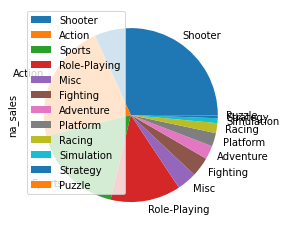

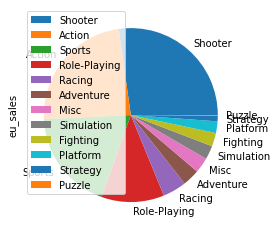

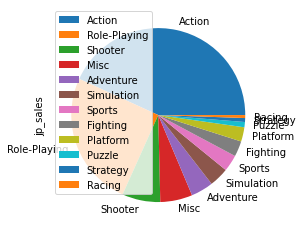

In [110]:
# отображение сводной таблицы с распределением продаж по жанрам в разных регионах
display(actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False))

# отображение круговых диаграмм
display(actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False)
                   .plot(y='na_sales', kind='pie'))

display(actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False)
                   .plot(y='eu_sales', kind='pie'))

display(actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False)
                   .plot(y='jp_sales', kind='pie'))

### Влияние рейтинга ESRB на продажи.

Наиболее популярные игры с рейтингом 'M' и 'E' у пользователей Европы и Северной Америки, и оставшиеся два места в списке (рейтинги 'T' и 'E10+') совпадают.<br>
У пользователей Японии список востребованности немного меняется, на первом и втором месте рейтинги 'T' и 'Е' соответственно, на 3-м и 4-ом местах рейтнги 'M' и 'E10+'.<br>
Интересно, что игры с рейтингом 'E10+' не пользуются спросом во всех трех регионах в сравнении.

**Иными словами, в Европе и Северной Америке наиболее востребованы игры с рейтингом от 17-ти лет ('M'), а в Японии игры с рейтингом от 13-ти лет ('T') <br>
Также, стоит отметить большое количество продаж игр с неопределенным рейтингом ESRB во всех регионах, в частности в Японии, где почти 65% продаж приходятся на такие игры. Можно предположить, что у пользователей в Японии в пул игр входят локально популярные игры, которые не так популярны за пределами региона, от чего у них и неопределенный рейтинг.**

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: int64

,eu_sales,jp_sales,na_sales
rating,,,
unknown,35.71,32.89,37.44
T,20.32,7.70,22.86
E,34.83,5.25,26.59
M,45.54,4.29,47.03
E10+,11.54,3.27,17.87


<AxesSubplot:ylabel='na_sales'>

<AxesSubplot:ylabel='eu_sales'>

<AxesSubplot:ylabel='jp_sales'>

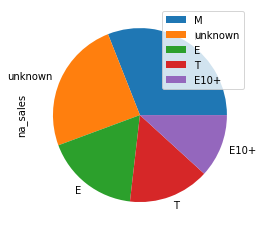

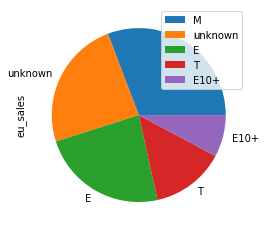

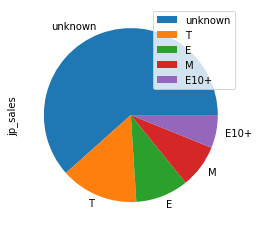

In [111]:
# замена пропусков на 'unknown'
actual_data.loc[(actual_data.rating.isna()), 'rating'] = 'unknown'

# проверка внесенных изменений
display(actual_data['rating'].value_counts())

# отображение сводной таблицы с распределением продаж по рейтингу ESRB в разных регионах
display(actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False))

# отображение круговых диаграмм
display(actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False)
                   .plot(y='na_sales', kind='pie'))

display(actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False)
                   .plot(y='eu_sales', kind='pie'))

display(actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False)
                   .plot(y='jp_sales', kind='pie'))


## Постановка и проверка гипотез.

### Первая гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформируем двухстороннюю гипотезу, где:
* **Н0: Средние пользовательские рейтинги платформы Xbox One равны средним пользовательскии рейтингам платформы PС.**
* **Н1: Средние пользовательские рейтинги платформы Xbox One не равны средним пользовательскии рейтингам платформы PС.**

Дисперсии и размеры выборок различны, следовательно параметр 'equal_var' будет иметь значение 'False' при вызове нужного метода.

In [112]:
# формирование выборок с играми платформ XOne и PC
actual_data_xone = actual_data.query('platform == "XOne"')
actual_data_pc = actual_data.query('platform == "PC"')

# вычисление размера выборок
display(len(actual_data_xone['user_score']))
display(len(actual_data_pc['user_score']))

# вычисление дисперсии
display(np.var(actual_data_xone['user_score']))
display(np.var(actual_data_pc['user_score']))

167

104

2.1082234820025954

3.0739158163265308

Вероятность получить одинаковые или близкие значения достаточна высокая (30%), как следствие, **отвергнуть нулевую гипотезу не получилось**.

In [113]:
# установка порогового значения
alpha = .01 

# применение теста для проверки равентсва двух генеральных совокупностей
results = st.ttest_ind(actual_data_xone.dropna(subset=['user_score'])['user_score'],
                       actual_data_pc.dropna(subset=['user_score'])['user_score'],
                       equal_var=False)

# вывод получившегося p-значения
display('p-value', results.pvalue) 

# проверка меньше ли p-значение чем пороговое значение
if results.pvalue < alpha: 
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value'

0.2946308864003345

'Не получилось отвергнуть нулевую гипотезу'

### Вторая гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные .

Сформируем двухстороннюю гипотезу, где:
* **Н0: Средние пользовательские рейтинги жанра 'Action' равны средним пользовательскии рейтингам жанра 'Sports'.**
* **Н1: Средние пользовательские рейтинги жанра 'Action' не равны средним пользовательскии рейтингам жанра 'Sports'.**

Дисперсии и размеры выборок аналогично различны. Параметр 'equal_var' будет иметь значение 'False'

In [114]:
# формирование выборок с играми жанров Action и Sports
actual_data_action = actual_data.query('genre == "Action"')
actual_data_sports = actual_data.query('genre == "Sports"')

# вычисление размера выборок
display(len(actual_data_action['user_score']))
display(len(actual_data_sports['user_score']))

# вычисление дисперсии
display(np.var(actual_data_action['user_score']))
display(np.var(actual_data_sports['user_score']))

431

107

1.8036618432709604

3.8252424152290296

Вероятность получить равные или близкие значения слишком низкая для принятия нулевой гипотезы, как следствие, **отвергаем нулевую гипотезу в пользу альтернативной.**

In [115]:
# установка порогового значения
alpha = .01 

# применение теста для проверки равентсва двух генеральных совокупностей
results = st.ttest_ind(actual_data_action.dropna(subset=['user_score'])['user_score'],
                       actual_data_sports.dropna(subset=['user_score'])['user_score'],
                       equal_var=False)

# вывод получившегося p-значения
display('p-value', results.pvalue) 

# проверка меньше ли p-значение чем пороговое значение
if results.pvalue < alpha: 
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value'

5.97163549920592e-10

'Отвергаем нулевую гипотезу'

## Общий вывод.

* **Проделанная работа**: посмотрели данные, привели названия столбцов к нижнему регистру, изменили типы данных в столбцах, по возможности обработали пропуски, добавили столбец с суммарным количеством продаж, отобрали потенциально прибыльные платформы и определили актуальный период, нашли корреляцию оценок критиков и пользователей к продажам, определили самые продаваемые жанры, составили портреты пользователей Северной Америки, Европы и Японии (популярность платформ, жанров, и определение влияния рейтинга ESRB), поставили две гипотезы и проверили их.
* Актуальный период: 2015-2016 год, потенциально прибыльные платформы: '3DS', 'XOne', 'PS4', взаимосвязь количества продаж и оценок пользователей/критиков в среднем выражена слабо, самые популярные жанры: 'Shooter', 'Action', 'Sports', из них самый прибыльный (соотношение кол-во проданных копий к кол-ву выпущенных игр) жанр - 'Shooter'. 
* **Портреты пользователей разных регионов**:
** **Европа**: платформы - 'PS4', 'XOne', 'PC', '3DS', 'PS3' с упором на семейство платформ PS, жанры - 'Shooter', 'Action', 'Sports', 'Role-Playing', 'Racing', влияние ESRB рейтинга - наиболее пользуются спросом игры с рейтингом 'M'.
** **Северная Америка**: платформы - 'PS4', 'XOne', '3DS', 'WiiU', 'X360' с упором на семейство платформ XBox, жанры - 'Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc', влияние ESRB рейтинга - наиболее пользуются спросом игры с рейтингом 'M'.
** **Япония**: платформы - '3DS', 'PS4', 'PSV', 'PS3', 'WiiU' (на платформы семейства XBox почти нет спроса), жанры - 'Action', 'Role-Playing', 'Shooter', 'Misc', 'Adventure', влияние ESRB рейтинга - наиболее пользуются спросом игры с рейтингом 'T'.
* Вероятность получить схожие пользовательские оценки на платформах Xbox One и PC достаточна высокая (29%). Вероятность того, что пользовательские оценки жанров 'Action' и 'Sports' будут близки по среднему значению очень маленькая. 
* Для определения потенциально прибыльной кампании для начала нужно определится с регионом проведения кампании. 
** **Если это будет Европа, то ставку можно сделать на игры жанра 'Shooter'  на платформе 'PS4', ESRB рейтинг - 'M'.** 
** **Если Северная Америка, то жанр 'Shooter' на платформе 'PS4', ESRB рейтинг - 'M'.**
** **В случае с Японией - жанр 'Action', платформа '3DS', ESRB рейтинг - 'T'.**